# Lineare Regression

Trainsingsdaten:
$$
\{(x^{(i)}, y^{(i)}); i = 1, \dots, d \}
$$

$x^{(d)}$ ist dabei ein Zeilenvektor dessen Länge die Anzahl an **Features** ist. $n$ ist die Menge an **Trainsingsdaten**.
Wir haben also mehrere Beispiele von Eingaben $x^{(n)}$ und Ausgaben $y^{(n)}$.
Außerdem gilt: $x^{(0)} = (0, \dots, 0)$ und $x_0=1$

| Feature 1 | Fature 2 | Feature d | Result |
|-----------|----------|-----------|--------|
| $x^0_0$   | $x^1_0$  | $x^d_0$   | $y_0$  |
| $x^0_1$   | $x^1_1$  | $x^d_1$   | $y_1$  |
| $x^0_2$   | $x^1_2$  | $x^d_2$   | $y_2$  |
| ....      | ....     | ...       | ...    |
| $x^0_n$   | $x^1_n$  | $x^d_n$   | $y_n$ |

Gesucht ist eine Funktion:
$$
    h: X \rightarrow Y
$$
Es kann die folgende Form für $h$ angenommen werden, wobei $\vec{\theta}$ Gewichte sind welche so berechnet werden, dass der quadratische Fehler zu allen Punkten im Datensatz möglichst gering ist. Allgemein gilt für $h$:
$$
h_\theta(\vec{x})=\sum_{i=0}^{n}\vec{\theta}_i\vec{x_i} = \langle\vec{\theta},\vec{x}\rangle
$$

## Kostenfunktion

Die Kostenfunktion gibt an wie weit $h_\theta(x)$ von $y$ entfernt ist (least-squares cost function):
$$
J(\vec{\theta})=\frac{1}{2n}\sum_{i=1}^d\left(h_\theta(x^{(i)}) - y^{(i)}\right)^2
$$
Ziel ist es die **Kostenfunktion** zu *minimieren*!



### Analytische Lösung

Um das zu erreichen setzen wir den Gradienten der Kostenfunktion auf Null und lösen auf:
$$
\Delta(J\theta)= \begin{pmatrix} \frac{\delta J}{\delta \theta_0} \\ \vdots \\ \frac{\delta J}{\delta \theta_d} \end{pmatrix} = 0
$$

Dafür definieren wir $J(\theta)$ in Matrixschreibweise:
$$
J(\vec{\theta})=\frac{1}{2n}\sum_{i=1}^d\left(h_\theta(\vec{x}^{(i)}) - \vec{y}^{(i)}\right)^2 \\
= \frac{1}{2n}(X\vec{\theta} - \vec{y})^T(X\vec{\theta} - \vec{y})
$$
wobei (beachte $x_0=1$) 
$$
X=\begin{bmatrix} 1 & (\vec{x}^{(1)})^T \\ \vdots & \vdots \\ 1 & (\vec{x}^{(n)})^T \end{bmatrix} \quad
X\vec{\theta} = \begin{bmatrix} (x^{(1)})^T\vec{\theta} \\ \vdots \\ (x^{(n)})^T\vec{\theta} \end{bmatrix}
= \begin{bmatrix} h_\theta(x^{(1)}) \\ \vdots \\ h_\theta(x^{(n)}) \end{bmatrix}
= \begin{bmatrix} \vec{\theta}_0 + \vec{\theta}_1 x^{(1)} \\ \vdots \\ \vec{\theta}_0 + \vec{\theta}_1 x^{(n)} \end{bmatrix}
$$

Aus dem Gradienten gleich Null:
$$
\nabla J(\theta) = \frac{1}{n}(X^TX\theta-X^T\vec{y}) = 0
$$
folgt für die Gewichte:
$$
\theta = (X^TX)^{-1}X^Ty
$$

Haben wir mehr Features als Datensätze $d > n$ sind einige Features redundant und linear von einander abhängig.
$(X^TX)^{-1}$ ist dann nicht mehr invertierbar!

Als Lösung können unnötige Features entfernt werden oder mehr Trainingsdaten gesammelt werden.

### Programmieraufgabe (Least-Square-Error)

In [1]:
import pandas as pd
import numpy as np

In [56]:
table = pd.read_csv('melb_data.csv', usecols=["BuildingArea", "Price"])
table.dropna(subset=['BuildingArea'], inplace=True)

area = np.array(table['BuildingArea'][:100])
price = np.array(table['Price'][:100])

table

Price  BuildingArea
1      1035000.0          79.0
2      1465000.0         150.0
4      1600000.0         142.0
6      1876000.0         210.0
7      1636000.0         107.0
...          ...           ...
13572   650000.0          79.0
13573   635000.0         172.0
13576  1031000.0         133.0
13578  2500000.0         157.0
13579  1285000.0         112.0

[7130 rows x 2 columns]

<Axes: >

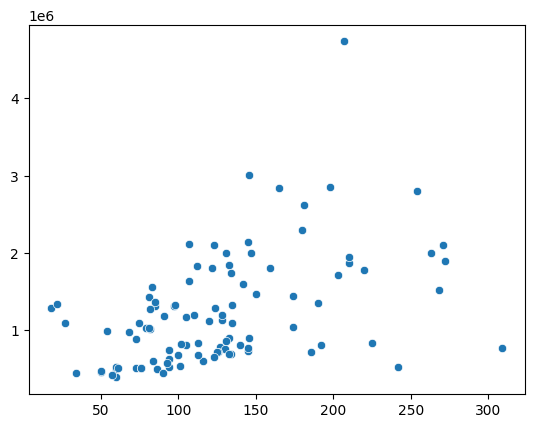

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.scatterplot(x=area, y=price, ax=ax)

In [62]:
# Create one feature array for "building area".
# Prepend x_0 = 1
X=[]
for row in area:
    X.append([1, row])

X = np.array(X)
Y = np.array(price)

<Axes: >

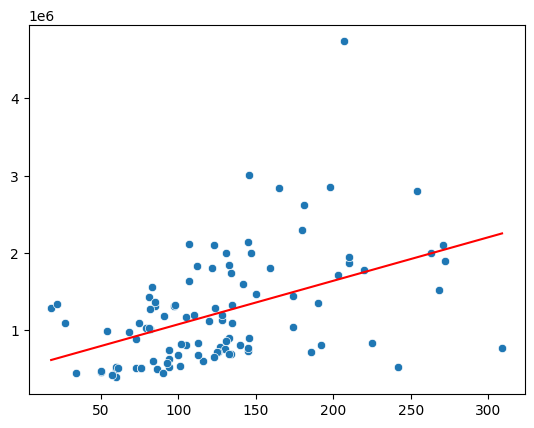

In [70]:
# Solve for theta with least-square method.
theta = np.linalg.solve(X.T @ X, X.T @ Y)

# Plot solution.
fig, ax = plt.subplots()
sns.scatterplot(x=area, y=price, ax=ax)
sns.lineplot(x=[min(area), max(area)], y=[theta[0] + theta[1] * min(area), theta[0] + theta[1] * max(area)], ax=ax, color='red') 

### Numerische Lösung mit Gradient Descent

Numerische Minimierung von $J(\theta)$.

Wir fange bei beliebigen $\theta$ an und führen iterativ folgende Operation auf $\theta$ aus:
$$
\theta \leftarrow \theta - \alpha \nabla J(\theta)
$$

Die Lernrate $\alpha$ bestimmt wie schnell wir dem Gradienten folgen. $\nabla J(\theta)$ ist der Gradient also die partielle Ableitung nach jedem einzelnen Feature.

$\alpha$ sollte ein sehr kleiner Wert sein!

<Axes: >

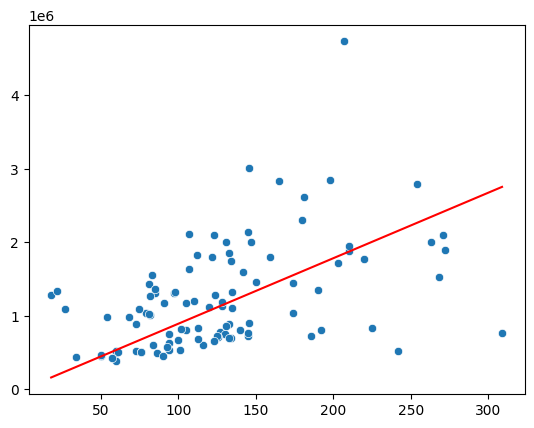

In [258]:
def gradient_descent(alpha, theta):
    return theta + sum([(Y[i] - theta * X[i]) * X[i] for i in range(1, len(X))]) / len(X) * alpha

# Initial value of theta doesn't matter.
theta = [0, 0]
# This is basically a magic number.
# Make sure to set this to a small value otherwise it will not converge.
alpha = 1e-6

for i in range(300):
    theta = gradient_descent(alpha, theta)

# Plot solution.
fig, ax = plt.subplots()
sns.scatterplot(x=area, y=price, ax=ax)
sns.lineplot(x=[min(area), max(area)], y=[theta[0] + theta[1] * min(area), theta[0] + theta[1] * max(area)], ax=ax, color='red') 